In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV, Lasso
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV

In [2]:
train_ori = pd.read_csv('train.csv')
test_ori = pd.read_csv('test.csv')
y_ori = train_ori['price']
y = np.log(y_ori) #4000 entries

#combine train and test data to do feature engineering for predictors
train = pd.concat([train_ori.drop('price',axis=1),test_ori],axis=0,ignore_index=True) #6000 entries


# Feature engineering

## Amenities

In [3]:
train['amenities_clean'] = np.nan
train['amenities_clean'] = train['amenities_clean'].astype('object')

for i in tqdm(range(len(train['amenities']))):
    train.at[i,'amenities_clean'] = train.loc[i,'amenities'][2:-2].split('", "')
    
for i in tqdm(range(len(train['amenities_clean']))):
    for j in range(len(train.loc[i,'amenities_clean'])):
        if 'Fast wifi \\u2013' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Fast Wifi'
        if 'Wifi \\u2013' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Wifi'
        if 'HDTV' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'HD Television'
        if 'TV' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'TV'
        if 'body soap' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Body soap'
        if 'shampoo' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Shampoo'
        if 'refrigerator' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Refrigerator'
        if 'fridge' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Refrigerator'
        if 'conditioner' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Conditioner'
        if 'stove' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Stove'
        if 'oven' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Oven'
        if 'sound system' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Sound system'
        if 'Sound system' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Sound system'
        if 'Clothing storage' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Clothing storage'
        if 'Children\\u2019s books and toys' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Children\\u2019s books and toys'
        if 'Shared hot tub' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Hot tub'
        if 'Private hot tub' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private hot tub'
        if 'Shared pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Pool'
        if 'Shared indoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Pool'
        if 'Shared outdoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Pool'
        if 'Private pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private pool'
        if 'Private indoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private pool'
        if 'Private outdoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private pool'
        if 'Free washer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Washer'
        if 'Paid washer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Paid Washer'
        if 'Washer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Washer'
        if 'Dryer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Dryer'
        if 'Free dryer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Dryer'
        if 'Paid dryer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Paid Dryer'
        if 'on premises' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Parking on premises'
        if 'off premises' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Parking off premises'
        if 'Free street parking' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Parking off premises'
        if 'conditioning' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Air conditioning'
        if 'Game console' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Game console'
        if 'Gym' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Gym'
        if 'gym' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Gym'
        if 'coffee' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Coffee maker'
        if 'sauna' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Sauna'
        if 'high chair' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'High chair'
        if 'High chair' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'High chair'
        if 'crib' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Crib'
        if 'Crib' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Crib'
        if 'Fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private garden or backyard'
        if 'Private fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private garden or backyard'
        if 'Shared fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Shared garden or backyard'
        if 'Private fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private garden or backyard'

100%|██████████| 6000/6000 [03:05<00:00, 32.37it/s]


In [4]:
amen_list = train['amenities_clean'].to_list()
vectorizer = CountVectorizer(analyzer=lambda x: x)
bow = vectorizer.fit_transform(amen_list)
bow_df = pd.DataFrame(bow.todense(), columns = vectorizer.get_feature_names())

train['description'][train['description'].isna()] = ''
# train['neighborhood_overview'][train['neighborhood_overview'].isna()] = ''
train['neighborhood_overview'] = train['neighborhood_overview'].fillna('NA')
# corpus_des = [i for i in train['description']]
corpus_des_neighbor = [i for i in train['neighborhood_overview']]

# tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
# tfidf_vectorizer.fit(corpus_des)
# tfidf = tfidf_vectorizer.transform(corpus_des)
# features = pd.DataFrame(tfidf.todense(), columns = tfidf_vectorizer.get_feature_names_out())

# tfidf_vectorizer_neighbor = TfidfVectorizer(stop_words = 'english')
# tfidf_vectorizer_neighbor.fit(corpus_des_neighbor)
# tfidf_neighbor = tfidf_vectorizer_neighbor.transform(corpus_des)
# features_neighbor = pd.DataFrame(tfidf_neighbor.todense(), columns = tfidf_vectorizer_neighbor.get_feature_names_out())

# all_features = pd.concat([bow_df,features,features_neighbor],axis=1)

# tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
# tfidf_vectorizer.fit(corpus_des)

# tfidf = tfidf_vectorizer.transform(corpus_des)

# features = pd.DataFrame(tfidf.todense(), columns = tfidf_vectorizer.get_feature_names_out())
corpus_des = [i for i in train['description']]
count_vectorizer = CountVectorizer(binary=True)
count_vectorizer.fit(corpus_des)

features = count_vectorizer.transform(corpus_des)

beach_index = count_vectorizer.get_feature_names().index('beach')
beach1 = np.array(features[:, beach_index].todense()).reshape(-1)
beach = pd.DataFrame(beach1, columns=['beach_dummy'])

apartment_index = count_vectorizer.get_feature_names().index('apartment')
apartment1 = np.array(features[:, apartment_index].todense()).reshape(-1)
apartment = pd.DataFrame(apartment1, columns=['apartment_dummy'])

walk_index = count_vectorizer.get_feature_names().index('walk')
walk1 = np.array(features[:, walk_index].todense()).reshape(-1)
walk = pd.DataFrame(walk1, columns=['walk_dummy'])

large_index = count_vectorizer.get_feature_names().index('large')
large1 = np.array(features[:, large_index].todense()).reshape(-1)
large = pd.DataFrame(large1, columns=['walk_dummy'])

city_index = count_vectorizer.get_feature_names().index('city')
city1 = np.array(features[:, city_index].todense()).reshape(-1)
city = pd.DataFrame(city1, columns=['city_dummy'])

views_index = count_vectorizer.get_feature_names().index('views')
views1 = np.array(features[:, views_index].todense()).reshape(-1)
views = pd.DataFrame(views1, columns=['views_dummy'])

private_index = count_vectorizer.get_feature_names().index('private')
private1 = np.array(features[:, private_index].todense()).reshape(-1)
private = pd.DataFrame(private1, columns=['private_dummy'])

home_index = count_vectorizer.get_feature_names().index('home')
home1 = np.array(features[:, home_index].todense()).reshape(-1)
home = pd.DataFrame(home1, columns=['home_dummy'])

balcony_index = count_vectorizer.get_feature_names().index('balcony')
balcony1 = np.array(features[:, balcony_index].todense()).reshape(-1)
balcony = pd.DataFrame(balcony1, columns=['balcony_dummy'])

bondi_index = count_vectorizer.get_feature_names().index('bondi')
bondi1 = np.array(features[:, bondi_index].todense()).reshape(-1)
bondi = pd.DataFrame(bondi1, columns=['bondi_dummy'])

house_index = count_vectorizer.get_feature_names().index('house')
house1 = np.array(features[:, house_index].todense()).reshape(-1)
house = pd.DataFrame(house1, columns=['house_dummy'])

corpus_des1 = [i for i in train['neighborhood_overview']]
count_vectorizer = CountVectorizer(binary=True)
count_vectorizer.fit(corpus_des1)

feature = count_vectorizer.transform(corpus_des1)

beachoverview_index = count_vectorizer.get_feature_names().index('beach')
beach_overview = np.array(feature[:, beachoverview_index].todense()).reshape(-1)
beach_overview = pd.DataFrame(beach_overview, columns=['beach_overview_dummy'])

bondioverview_index = count_vectorizer.get_feature_names().index('bondi')
bondi_overview = np.array(feature[:, bondioverview_index].todense()).reshape(-1)
bondi_overview = pd.DataFrame(bondi_overview, columns=['bondi_overview_dummy'])

walkoverview_index = count_vectorizer.get_feature_names().index('walk')
walk_overview = np.array(feature[:, walkoverview_index].todense()).reshape(-1)
walk_overview = pd.DataFrame(walk_overview, columns=['walk_overview_dummy'])

cityoverview_index = count_vectorizer.get_feature_names().index('city')
city_overview = np.array(feature[:, cityoverview_index].todense()).reshape(-1)
city_overview = pd.DataFrame(city_overview, columns=['city_overview_dummy'])

shortoverview_index = count_vectorizer.get_feature_names().index('short')
short_overview = np.array(feature[:, shortoverview_index].todense()).reshape(-1)
short_overview = pd.DataFrame(short_overview, columns=['short_overview_dummy'])

centreoverview_index = count_vectorizer.get_feature_names().index('centre')
centre_overview = np.array(feature[:, centreoverview_index].todense()).reshape(-1)
centre_overview = pd.DataFrame(centre_overview, columns=['centre_overview_dummy'])

habouroverview_index = count_vectorizer.get_feature_names().index('habour')
habour_overview = np.array(feature[:, habouroverview_index].todense()).reshape(-1)
habour_overview = pd.DataFrame(habour_overview, columns=['habour_overview_dummy'])

walkingoverview_index = count_vectorizer.get_feature_names().index('walking')
walking_overview = np.array(feature[:, walkingoverview_index].todense()).reshape(-1)
walking_overview = pd.DataFrame(walking_overview, columns=['walk_overview_dummy'])

cbdingoverview_index = count_vectorizer.get_feature_names().index('cbd')
cbding_overview = np.array(feature[:, cbdingoverview_index].todense()).reshape(-1)
cbding_overview = pd.DataFrame(cbding_overview, columns=['cbd_overview_dummy'])

overview=pd.concat([walk_overview,bondi_overview,beach_overview,cbding_overview,walking_overview
                    ,habour_overview,centre_overview,short_overview,city_overview],axis=1)
des=pd.concat([walk,beach,views,city,large,apartment],axis=1)

C:\Users\hezes\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hezes\AppData\Local\Temp\ipykernel_20416\1481166236.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['description'][train['description'].isna()] = ''
C:\Users\hezes\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hezes\anaconda3\lib\site-packages\sklearn\utils\deprecation.py

## room_tyoe, instant bookable, property type, minimum night

In [5]:
## room_type
room_type_dummy=np.select(
    condlist=[ 
        train['room_type'].str.contains('Private', case=False),
        train['room_type'].str.contains('entire', case=False),
        train['room_type'].str.contains('shared', case=False),
        ],
    choicelist=['Private', 'entire', 'shared'],
    default='Hotel'
)
room_type_dummy = pd.DataFrame(room_type_dummy,columns=['room_type_dummy'])
room_type_dummy=pd.get_dummies(room_type_dummy)
## Instant bookable
instant_bookable_dummy=pd.get_dummies(train['instant_bookable'],drop_first = True)
instant_bookable_dummy.columns=['instant_bookable_dummy']
# property type
# la=train['property_type']
# property_type_dummy = np.select(
#     condlist=[
#         la.str.contains('Private', case=False),
#         la.str.contains('entire', case=False),
#         ],
#     choicelist=['Private', 'entire'],
#     default='others'
# )

property_type_dummy = pd.DataFrame(train['property_type'])
property_type_dummy=pd.get_dummies(property_type_dummy,drop_first = True)
# Minimum night
minimum_night=train['minimum_nights']

# minimum_night.values[minimum_night < 28] = 0
# minimum_night.values[minimum_night >= 28] = 1


## house_response_time, house_response_rate, house_acceptance_rate, host_is_superhost, host_identity_verified, host_verifications

In [6]:
train["host_response_time"] = train["host_response_time"].fillna('NA')
host_response_time_dummy = np.select(
    condlist=[ 
       train['host_response_time'].str.contains('within an hour', case=False),
        train['host_response_time'].str.contains('within a few hours', case=False),
        train['host_response_time'].str.contains('within a day', case=False),
        train['host_response_time'].str.contains('a few days or more', case=False),
        ],
    choicelist=['within an hour', 'within a few hours', 'within a day','a few days or more'],
    default='others'
)
host_response_time_dummy = pd.DataFrame(host_response_time_dummy,columns=['host_response_time_dummy'])
host_response_time_dummy = pd.get_dummies(host_response_time_dummy)

In [7]:
train["host_response_rate"] = train["host_response_rate"].astype('str')
train["host_response_rate"] = train["host_response_rate"].str.replace("%","")
train["host_response_rate"] = train["host_response_rate"].astype('float')
def hostrrate(rrate):
    if rrate > 75:
        return 'rrate over 75'
    elif rrate > 50:
        return 'rrate over 50'
    else:
        return 'rrate under 50'
train["host_response_rate"] = train["host_response_rate"].apply(hostrrate)
host_response_rate_dummy = np.select(
    condlist=[ 
       train['host_response_rate'].str.contains('rrate over 50', case=False),
        train['host_response_rate'].str.contains('rrate over 75', case=False),
        ],
    choicelist=['rrate over 50', 'rrate over 75',],
    default='rrate under 50'
)
host_response_rate_dummy = pd.DataFrame(host_response_rate_dummy,columns=['host_response_rate_dummy'])
host_response_rate_dummy = pd.get_dummies(host_response_rate_dummy)

In [8]:
train["host_acceptance_rate"] = train["host_acceptance_rate"].astype('str')
train["host_acceptance_rate"] = train["host_acceptance_rate"].str.replace("%","")
train["host_acceptance_rate"] = train["host_acceptance_rate"].astype('float')
def hostarate(arate):
    if arate > 75:
        return 'arate over 75'
    elif arate > 50:
        return 'arate over 50'
    else:
        return 'arate under 50'
train["host_acceptance_rate"] = train["host_acceptance_rate"].apply(hostarate)
host_acceptance_rate_dummy = np.select(
    condlist=[ 
       train['host_acceptance_rate'].str.contains('rrate over 50', case=False),
        train['host_acceptance_rate'].str.contains('rrate over 75', case=False),
        ],
    choicelist=['rrate over 50', 'rrate over 75',],
    default='rrate under 50'
)
host_acceptance_rate_dummy = pd.DataFrame(host_acceptance_rate_dummy,columns=['host_acceptance_rate_dummy'])
host_acceptance_rate_dummy = pd.get_dummies(host_acceptance_rate_dummy)

In [9]:
host_is_superhost_dummy=pd.get_dummies(train['host_is_superhost'],drop_first = True)
host_is_superhost_dummy.columns=['host_is_superhost']

In [10]:
host_identity_verified_dummy=pd.get_dummies(train['host_identity_verified'],drop_first = True)
host_identity_verified_dummy.columns=['host_identity_verified']

In [11]:
host_identity_verified_dummy=pd.get_dummies(train['host_identity_verified'],drop_first = True)
host_identity_verified_dummy.columns=['host_identity_verified']

train.loc[train["host_verifications"] == "['email', 'phone', 'work_email']", "host_verifications"] = 'Three types of verifications'
train.loc[train["host_verifications"] == "['email', 'phone']", "host_verifications"] = 'Two types of verifications'
train.loc[train["host_verifications"] == "['phone', 'work_email']", "host_verifications"] = 'Two types of verifications'
train.loc[train["host_verifications"] == "['email']", "host_verifications"] = 'One types of verifications'
train.loc[train["host_verifications"] == "['phone']", "host_verifications"] = 'One types of verifications'
train.loc[train["host_verifications"] == "[]", "host_verifications"] = 'Two types of verifications'
host_verifications_dummy = np.select(
    condlist=[ 
       train['host_verifications'].str.contains('One types of verifications', case=False),
        train['host_verifications'].str.contains('Two types of verifications', case=False),
        ],
    choicelist=['One types of verifications', 'Two types of verifications',],
    default='Three types of verifications'
)
host_verifications_dummy = pd.DataFrame(host_verifications_dummy,columns=['host_verifications_dummy'])
host_verifications_dummy = pd.get_dummies(host_verifications_dummy,drop_first = True)

In [12]:
host_identity_verified_dummy=pd.get_dummies(train['host_identity_verified'],drop_first = True)
host_identity_verified_dummy.columns=['host_identity_verified']

train.loc[train["host_verifications"] == "['email', 'phone', 'work_email']", "host_verifications"] = 'Three types of verifications'
train.loc[train["host_verifications"] == "['email', 'phone']", "host_verifications"] = 'Two types of verifications'
train.loc[train["host_verifications"] == "['email', 'work_email']", "host_verifications"] = 'Two types of verifications'
train.loc[train["host_verifications"] == "['phone', 'work_email']", "host_verifications"] = 'Two types of verifications'
train.loc[train["host_verifications"] == "['email']", "host_verifications"] = 'One types of verifications'
train.loc[train["host_verifications"] == "['phone']", "host_verifications"] = 'One types of verifications'
train.loc[train["host_verifications"] == "['work_email']", "host_verifications"] = 'One types of verifications'
train.loc[train["host_verifications"] == "[]", "host_verifications"] = 'Zero types of verifications'
host_verifications_dummy = np.select(
    condlist=[ 
       train['host_verifications'].str.contains('One types of verifications', case=False),
        train['host_verifications'].str.contains('Two types of verifications', case=False),
        train['host_verifications'].str.contains('Three types of verifications', case=False),
        ],
    choicelist=['One types of verifications', 'Two types of verifications','Three types of verifications'],
    default='Zero types of verifications'
)
host_verifications_dummy = pd.DataFrame(host_verifications_dummy,columns=['host_verifications_dummy'])
host_verifications_dummy = pd.get_dummies(host_verifications_dummy,drop_first = True)

In [13]:
train['log_number_of_reviews'] = np.log(train['number_of_reviews'])

log_number_of_reviews=train['log_number_of_reviews']


review_scores_rating=train['review_scores_rating']

review_scores_rating.values[review_scores_rating < 4.5] = 0
review_scores_rating.values[review_scores_rating >= 4.5] = 1

review_scores_accuracy=train['review_scores_accuracy']

review_scores_accuracy.values[review_scores_accuracy < 4.5] = 0
review_scores_accuracy.values[review_scores_accuracy >= 4.5] = 1

review_scores_cleanliness=train['review_scores_cleanliness']

review_scores_cleanliness.values[review_scores_cleanliness < 4.5] = 0
review_scores_cleanliness.values[review_scores_cleanliness >= 4.5] = 1

review_scores_checkin=train['review_scores_checkin']

review_scores_checkin.values[review_scores_checkin < 4.5] = 0
review_scores_checkin.values[review_scores_checkin >= 4.5] = 1

review_scores_communication=train['review_scores_communication']

review_scores_communication.values[review_scores_communication < 4.5] = 0
review_scores_communication.values[review_scores_communication >= 4.5] = 1

review_scores_location=train['review_scores_location']

review_scores_location.values[review_scores_location < 4.5] = 0
review_scores_location.values[review_scores_location >= 4.5] = 1

review_scores_value=train['review_scores_value']

review_scores_value.values[review_scores_value < 4.5] = 0
review_scores_value.values[review_scores_value >= 4.5] = 1

reviews_per_month=train['reviews_per_month']

reviews_per_month.values[reviews_per_month < 4.5] = 0
reviews_per_month.values[reviews_per_month >= 4.5] = 1



# shenwei=pd.concat([log_number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness, review_scores_checkin,review_scores_communication,review_scores_value,reviews_per_month].axis=1)


## Location

In [14]:
#Location = pd.get_dummies(train['neighbourhood_cleansed'])
Location = train[['latitude','longitude']]

In [15]:
emily = pd.concat([host_response_time_dummy, host_response_rate_dummy,host_acceptance_rate_dummy,host_is_superhost_dummy,train['host_listings_count'],host_verifications_dummy],axis=1)
# emily = pd.concat([host_response_time_dummy, host_response_rate_dummy,host_acceptance_rate_dummy,host_is_superhost_dummy,host_verifications_dummy,train['host_listings_count']])


In [16]:
train['start_year'] = pd.to_datetime(train['host_since']).dt.year

C:\Users\hezes\AppData\Local\Temp\ipykernel_20416\2491382586.py:1: UserWarning: Parsing '21/11/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  train['start_year'] = pd.to_datetime(train['host_since']).dt.year
C:\Users\hezes\AppData\Local\Temp\ipykernel_20416\2491382586.py:1: UserWarning: Parsing '13/12/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  train['start_year'] = pd.to_datetime(train['host_since']).dt.year
C:\Users\hezes\AppData\Local\Temp\ipykernel_20416\2491382586.py:1: UserWarning: Parsing '25/10/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  train['start_year'] = pd.to_datetime(train['host_since']).dt.year
C:\Users\hezes\AppData\Local\Temp\ipykernel_20416\2491382586.py:1: UserWarning: Parsing '19/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsi

C:\Users\hezes\AppData\Local\Temp\ipykernel_20416\2491382586.py:1: UserWarning: Parsing '30/12/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  train['start_year'] = pd.to_datetime(train['host_since']).dt.year
C:\Users\hezes\AppData\Local\Temp\ipykernel_20416\2491382586.py:1: UserWarning: Parsing '23/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  train['start_year'] = pd.to_datetime(train['host_since']).dt.year
C:\Users\hezes\AppData\Local\Temp\ipykernel_20416\2491382586.py:1: UserWarning: Parsing '30/12/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  train['start_year'] = pd.to_datetime(train['host_since']).dt.year
C:\Users\hezes\AppData\Local\Temp\ipykernel_20416\2491382586.py:1: UserWarning: Parsing '31/12/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsi

In [17]:
# train['bedrooms'],train['beds'],
train['neighborhood_overview'] = train['neighborhood_overview'].fillna(train['neighbourhood'])
neighbourhood_cleansed_dummy=pd.get_dummies(train['neighbourhood_cleansed'],drop_first = True)

neighbourhooddummy=pd.get_dummies(train['neighbourhood'],drop_first = True)

# train['log_number_of_reviews'] = np.log(train['number_of_reviews'])

# log_number_of_reviews=train['log_number_of_reviews']

# log_number_of_reviews.values[log_number_of_reviews < 4.5] = 0
# log_number_of_reviews.values[log_number_of_reviews >= 4.5] = 1

# review_scores_rating=train['review_scores_rating']

# review_scores_rating.values[review_scores_rating < 4.5] = 0
# review_scores_rating.values[review_scores_rating >= 4.5] = 1



zeshen=pd.concat([des,overview,train['minimum_nights'],train['maximum_nights']
                  ,property_type_dummy,instant_bookable_dummy,train['accommodates']],axis=1)


In [18]:

combine = pd.concat([zeshen,Location,bow_df,log_number_of_reviews, review_scores_rating,review_scores_accuracy, 
                     review_scores_cleanliness,review_scores_location ,review_scores_checkin,review_scores_communication,review_scores_value,reviews_per_month],axis=1)

In [19]:
combine = combine.loc[:,~combine.columns.duplicated()]
duplicate_columns = combine.columns[combine.columns.duplicated()]
print(duplicate_columns)

Index([], dtype='object')


## Advanced Tree

In [20]:
X_train, X_test, y_train, y_test = train_test_split(combine[:4000], y, test_size = 0.2,random_state = 2)


## Tree: cost complexity pruned regression tree

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(min_samples_leaf=5, random_state=1)
path = tree.cost_complexity_pruning_path(X_train, y_train)

model = DecisionTreeRegressor(min_samples_leaf=5, random_state=1)

tuning_parameters = {'ccp_alpha': path.ccp_alphas,}
tree_cv = GridSearchCV(model, tuning_parameters, cv=5, return_train_score=False)
tree_cv.fit(X_train, y_train)

tree = tree_cv.best_estimator_
tree_cv.best_params_

{'ccp_alpha': 0.0010647787933558625}

In [22]:
predictors = list(combine[:4000].columns.values[:])
# len(predictors)


In [23]:
tree.get_n_leaves()

34

In [24]:
tree.get_depth()

8

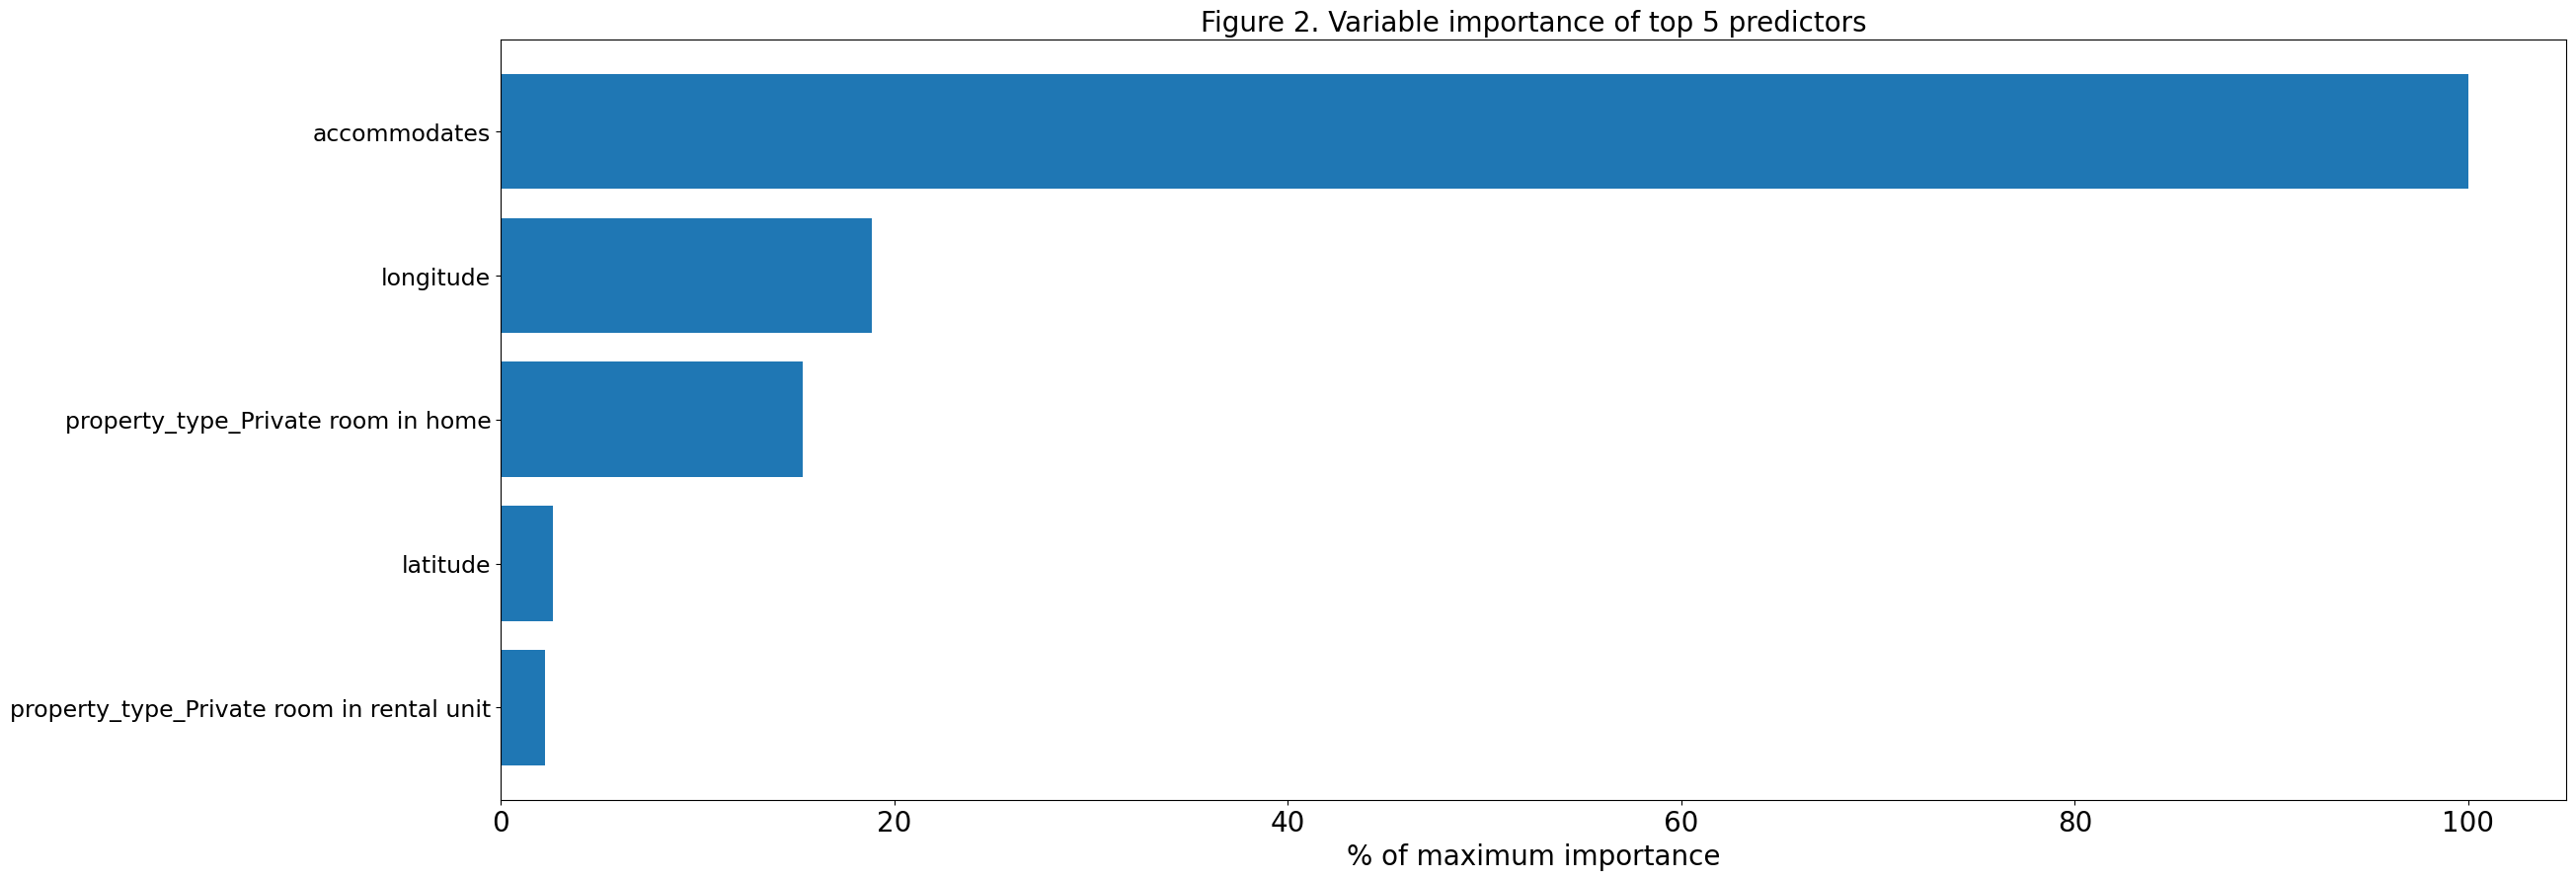

In [25]:
p = 5

importance = 100*(tree.feature_importances_/np.max(tree.feature_importances_))
feature_importance = pd.Series(importance, index=predictors).sort_values(ascending=True)
plt.figure(figsize=(27, 10))
plt.barh(np.arange(p), feature_importance[-p:])
plt.yticks(np.arange(p), feature_importance[-p:].index, fontsize=17)
plt.xticks(fontsize = 20)
plt.xlabel('% of maximum importance', fontsize=20)
plt.title('Figure 2. Variable importance of top {} predictors'.format(p), fontsize=20);
# plt.savefig('top 5.pdf')

In [26]:
feature_importance[-30:]

property_type_Room in aparthotel                    0.000000
property_type_Room in bed and breakfast             0.000000
property_type_Room in boutique hotel                0.000000
property_type_Room in hostel                        0.000000
property_type_Room in hotel                         0.000000
property_type_Room in serviced apartment            0.000000
property_type_Shared room in bed and breakfast      0.000000
property_type_Shared room in earthen home           0.000000
Baby safety gates                                   0.000000
property_type_Shared room in rental unit            0.000000
property_type_Tent                                  0.000000
property_type_Shared room in hostel                 0.000000
property_type_Train                                 0.000000
Baby bath                                           0.000000
instant_bookable_dummy                              0.000000
Air conditioning                                    0.000000
AC - split type ductless

In [27]:
validation_results = pd.DataFrame(columns=['RMSE', 'R2'])

In [28]:
y_pred = cross_val_predict(tree, X_train, y_train, cv=5)

rmse = mean_squared_error(y_train, y_pred, squared=False)
r2 = r2_score(y_train, y_pred)

validation_results.loc['Regressor decision tree'] = rmse, r2

In [29]:
validation_results.round(2)

,RMSE,R2
Regressor decision tree,0.45,0.64


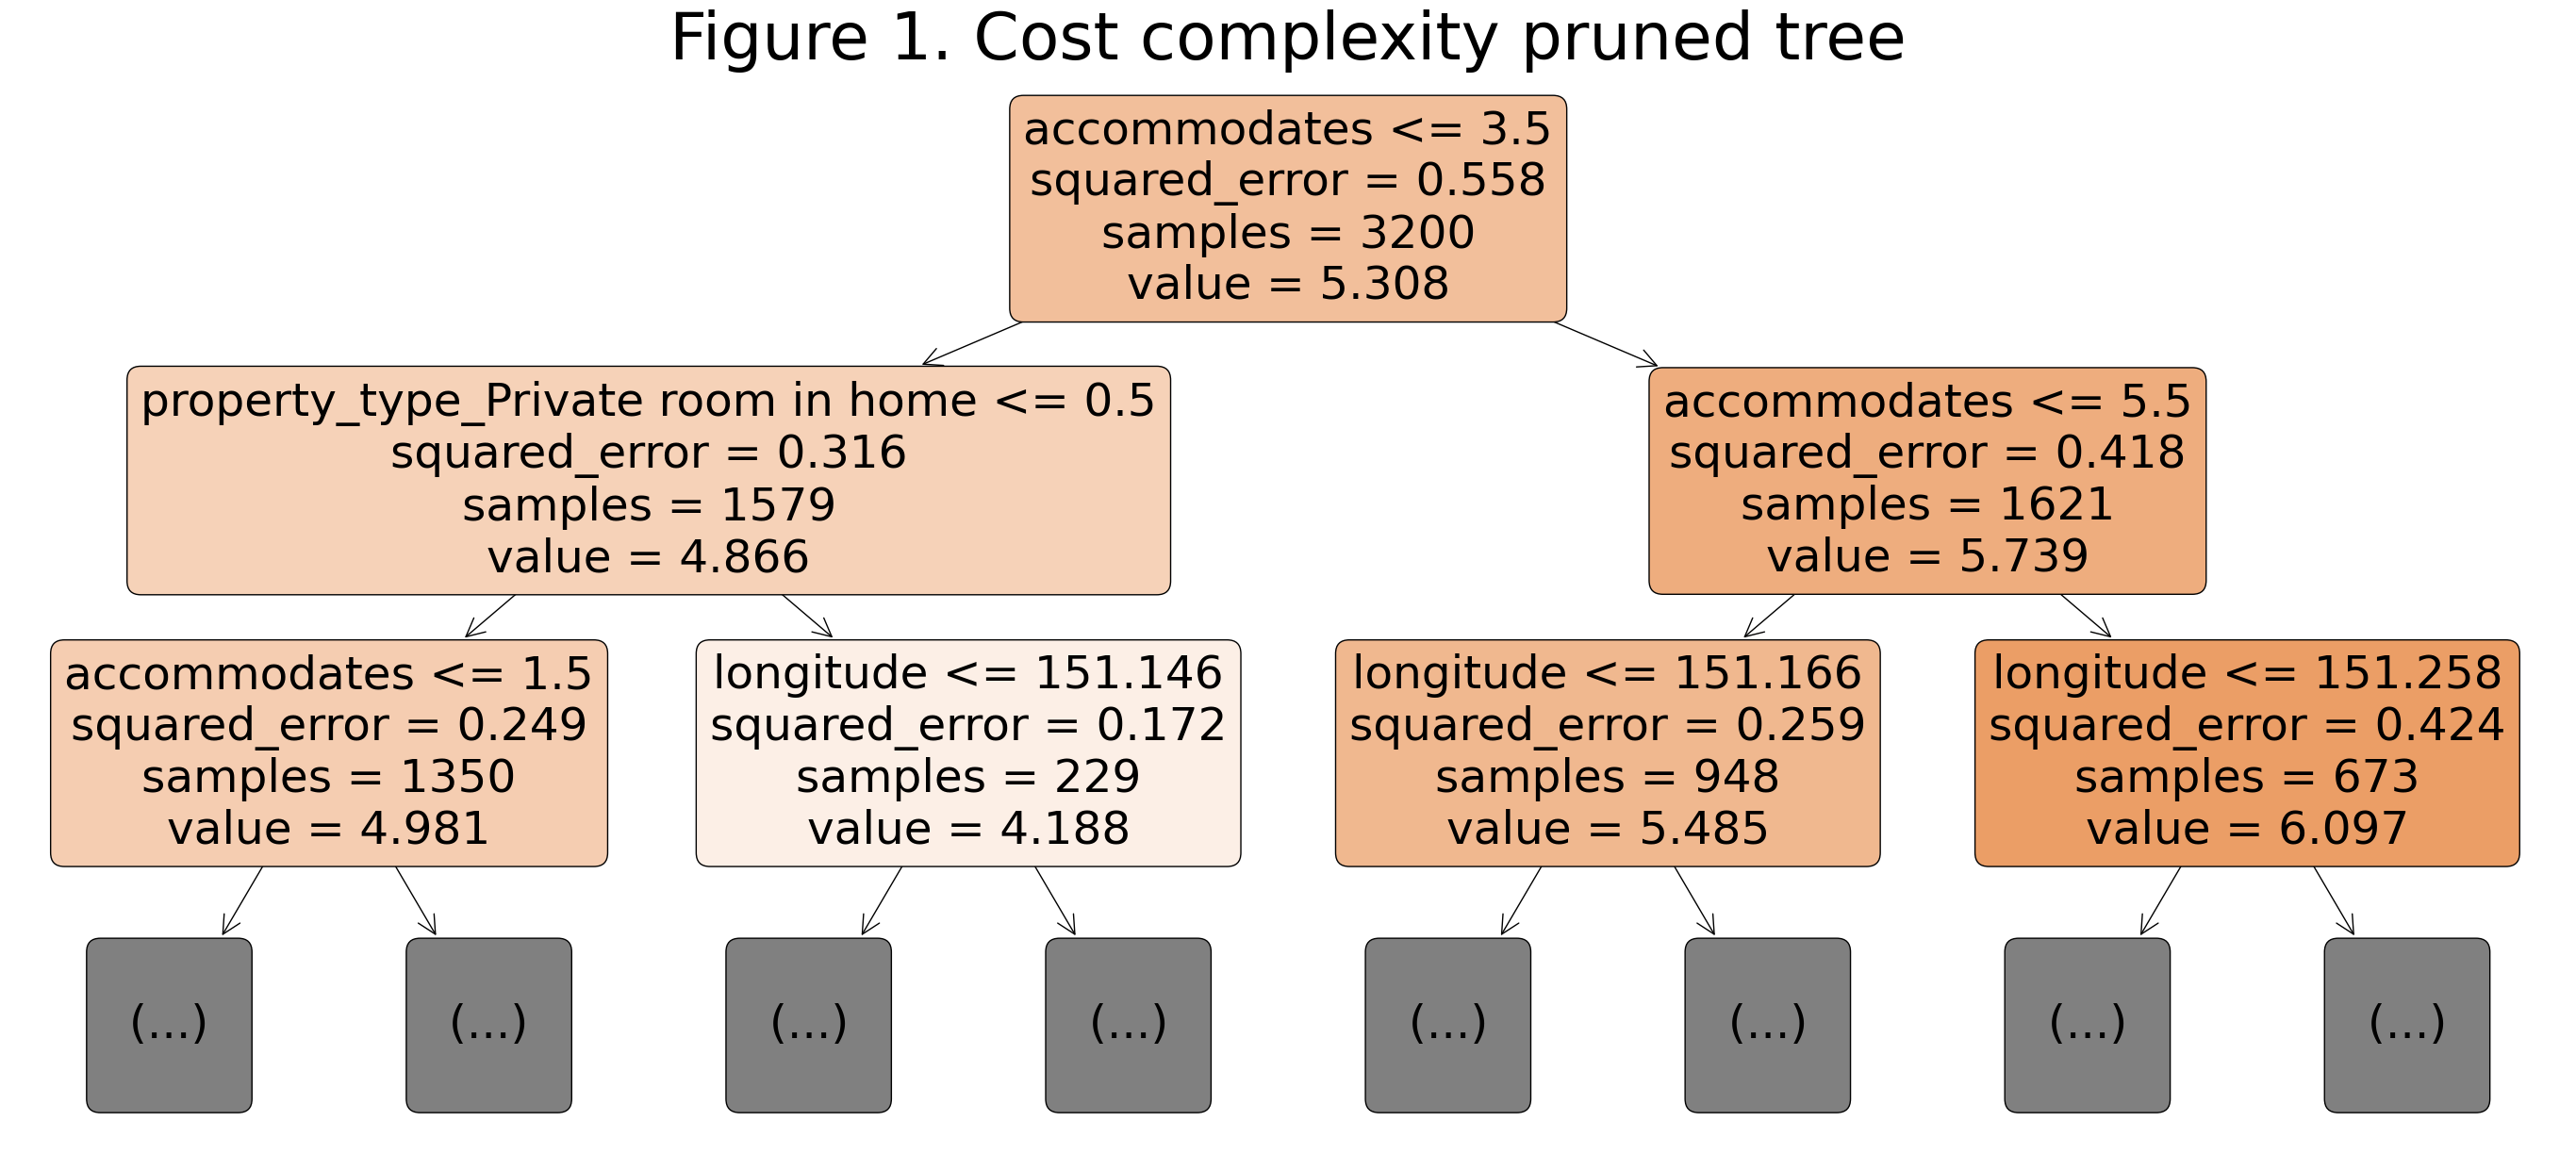

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(35, 15))
plot_tree(tree, rounded=True, filled=True, feature_names=predictors, max_depth=2, fontsize=35)
plt.title('Figure 1. Cost complexity pruned tree', fontsize=50);
# plt.savefig('tree.pdf')

## Bagged Trees

In [31]:
from sklearn.ensemble import BaggingRegressor

bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators=200, random_state=1)
bag.fit(X_train, y_train);

## Random forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=1)

tuning_parameters = {
    'min_samples_leaf': [5, 10, 20],
    'max_features': [10, 50, 100],
}

rf_cv = GridSearchCV(model, tuning_parameters, cv=5, return_train_score=False, n_jobs=4)
rf_cv.fit(X_train, y_train)
rf = rf_cv.best_estimator_

rf_cv.best_params_

{'max_features': 100, 'min_samples_leaf': 5}

In [33]:
rf.n_estimators = 2000
rf.fit(X_train, y_train);

## Gradient boost

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=2000, subsample=0.5)
gb.fit(X_train, y_train);

In [35]:
len(predictors)

222

In [36]:
len(gb.feature_importances_)

222

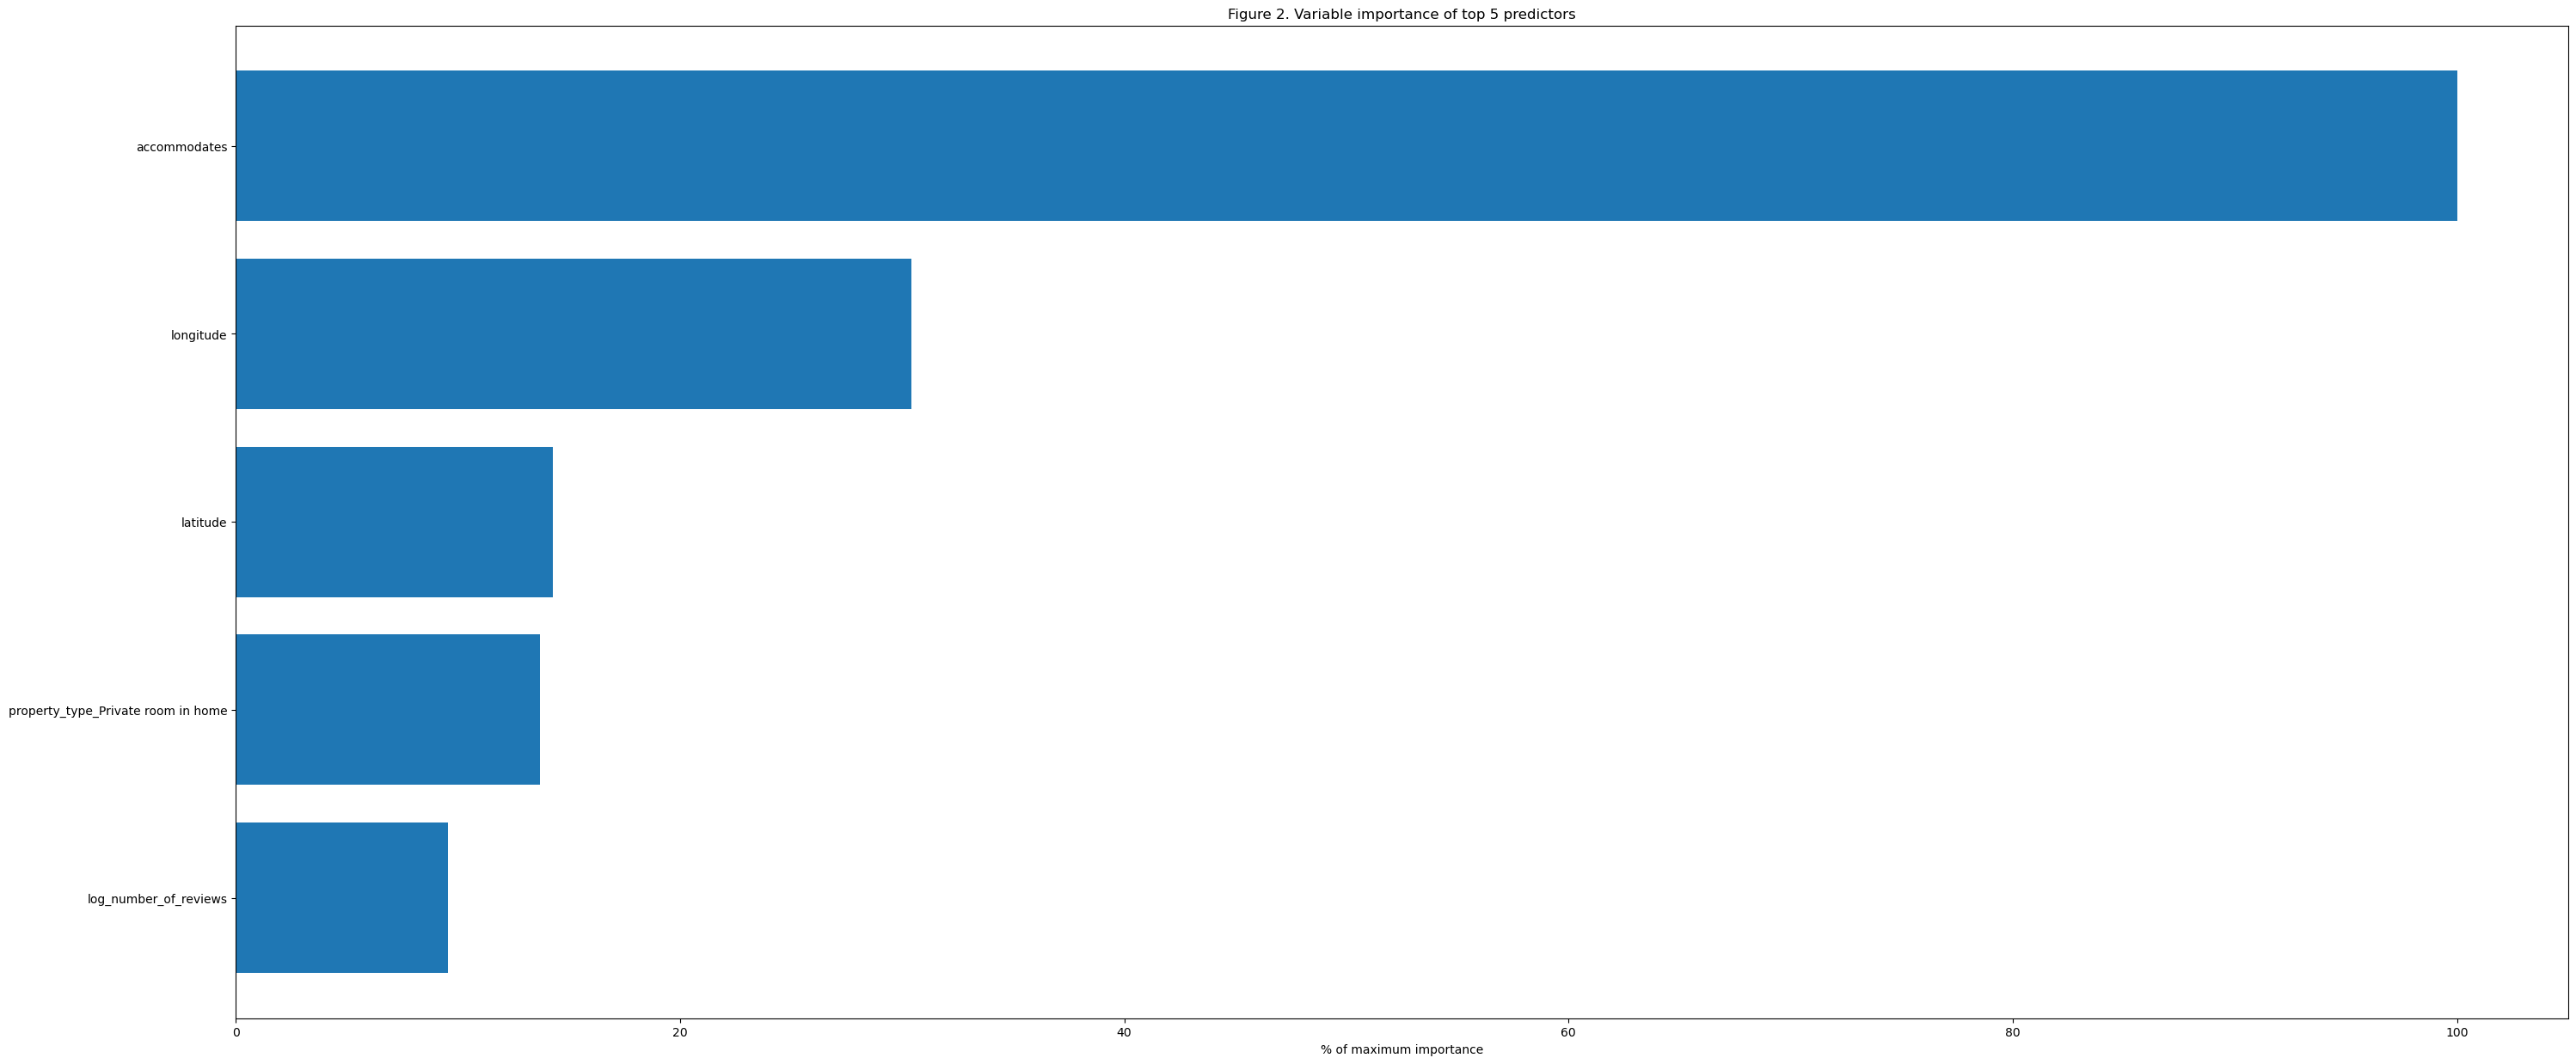

In [37]:
p = 5

importance = 100*(gb.feature_importances_/np.max(gb.feature_importances_))
feature_importance = pd.Series(importance, index=predictors).sort_values(ascending=True)
plt.figure(figsize=(35, 15))
plt.barh(np.arange(p), feature_importance[-p:])
plt.yticks(np.arange(p), feature_importance[-p:].index)
plt.xlabel('% of maximum importance')
plt.title('Figure 2. Variable importance of top {} predictors'.format(p));


## Addictive boosting
boost a lasso regression with a random forest model, and a Gradient Boost model

## OLS

In [38]:
from sklearn.linear_model import LinearRegression

# ols = LinearRegression()
# ols.fit(X_train, y_train);

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5)
lasso.fit(X_train_scaled, y_train);

In [40]:
y_fit = lasso.predict(X_train_scaled)
resid = y_train - y_fit

In [41]:
## regid 
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-5, 4, 151)

ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train_scaled, y_train);

In [42]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

elastic_net = ElasticNetCV(l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], cv=5)
elastic_net.fit(X_train_scaled, y_train)
best_elastic_net = ElasticNet(l1_ratio=elastic_net.l1_ratio_, alpha=elastic_net.alpha_);

### a. random forest boost

In [43]:
# param_grid = {"max_features":  [100,150,200],
#               "n_estimators": [1000,1500,2000],
#               "min_samples_leaf": [1,2,3]}
# search = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=5).fit(X_train, y_train)

# rf_boost = RandomForestRegressor(n_estimators=search.best_params_["n_estimators"], min_samples_leaf=search.best_params_["min_samples_leaf"],
#                                  max_features=search.best_params_["max_features"], random_state=1, n_jobs=4)
rf_boost = RandomForestRegressor(n_estimators=1000, min_samples_leaf=1,
                                 max_features=150, random_state=1, n_jobs=4)
rf_boost.fit(X_train, resid);

In [44]:
# print("The best hyperparameters are ",search.best_params_)

In [45]:
# print('R2 Value:',metrics.r2_score(y_train, rf_boost.predict(X_train)))

In [46]:
y_pred = lasso.predict(X_test_scaled) + rf_boost.predict(X_test)

### b. gradient boost boost

In [47]:
# param_grid = {"max_depth":    [2,3,4,5,6],
#               "n_estimators": [700,850,1000,1500],
#               "learning_rate": [0.01, 0.015,0.02]}
# search = RandomizedSearchCV(GradientBoostingRegressor(), param_grid, cv=5).fit(X_train, y_train)


# gb_boost = GradientBoostingRegressor(learning_rate=search.best_params_["n_estimators"],
#                                      max_depth=search.best_params_["max_depth"],
#                                      n_estimators=search.best_params_["learning_rate"], subsample=0.5)

gb_boost = GradientBoostingRegressor(learning_rate=0.015,
                                     max_depth=2,
                                     n_estimators=2000, subsample=0.5)
gb_boost.fit(X_train, resid);

In [48]:
# print("The best hyperparameters are ",search.best_params_)

In [49]:
# print('R2 Value:',metrics.r2_score(y_train, gb_boost.predict(X_train)))

In [50]:
y_pred = lasso.predict(X_test_scaled) + gb_boost.predict(X_test)

In [51]:
## adaboost boost
from sklearn import metrics
from sklearn.ensemble import AdaBoostRegressor
DTR=DecisionTreeRegressor(max_depth=2)
ada = AdaBoostRegressor(random_state=1, base_estimator=DTR, n_estimators=300)
ada.fit(X_train, y_train)
print('R2 Value:',metrics.r2_score(y_train, ada.predict(X_train)))

R2 Value: 0.5658631656350437


In [52]:
import sys
!{sys.executable} -m pip install xgboost

In [89]:
##xgboost
from xgboost import XGBRegressor

# fit model on training data
regressor=XGBRegressor()
param_grid = {"max_depth":    [2,3,4, 5],
              "n_estimators": [500, 600, 700, 800,900,1000],
              "learning_rate": [0.01, 0.015,0.018,0.02]}
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)
xgb=XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.018, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [90]:
xgbb=xgb.fit(X_train, resid)

In [91]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.018, 'max_depth': 5, 'n_estimators': 1000}


In [92]:
print('R2 Value:',metrics.r2_score(y_train, xgb.predict(X_train)))

R2 Value: -50.295739847224425


In [93]:
print('R2 Value:',metrics.r2_score(y_test, xgb.predict(X_test)))

R2 Value: -46.685176486382645


## Model stack

In [59]:
from sklearn.ensemble import StackingRegressor
models = [('Ridge Regression', ridge), ('Gradient Boost', gb), ('lasso',lasso),('Gradient BoostBoost', gb_boost),("Random forest boost",rf_boost),('xgboost',xgb),('XGboost boost',xgbb),('ada',ada)]
stack = StackingRegressor(models, final_estimator=LinearRegression(positive=True), cv=5, n_jobs=4)
stack.fit(X_train, y_train);


In [60]:
print('R2 Value:',metrics.r2_score(y_test, stack.predict(X_test)))

R2 Value: 0.7938722120941173


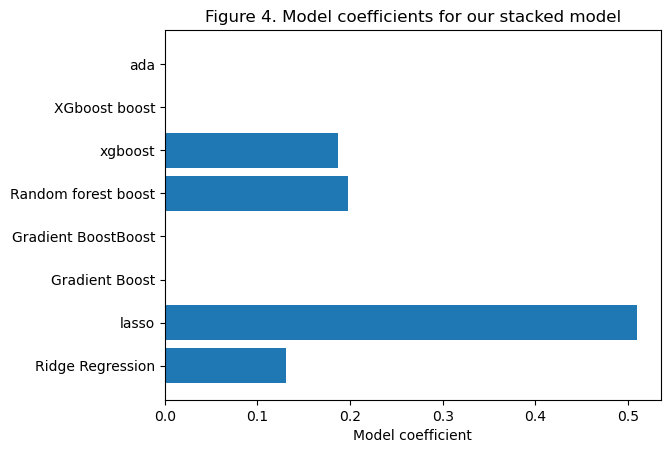

In [61]:
plt.barh(np.arange(len(models)), stack.final_estimator_.coef_)
plt.yticks(np.arange(len(models)), ['Ridge Regression','lasso', 'Gradient Boost', 'Gradient BoostBoost',"Random forest boost",'xgboost','XGboost boost','ada']);
plt.xlabel('Model coefficient')
plt.title('Figure 4. Model coefficients for our stacked model');

## Model evaluation

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
methods = {
#     'OLS': ols,
    'Lasso': lasso,
    'Ridge': ridge,
    'Elastic Net': elastic_net,
    'Tree': tree,
    'Bgged': bag,
    'Random Forest': rf,
    'Gradient Boost': gb,
    'Model Stack': stack,
    'Random Forest Boost': rf_boost,
    'Gradient Boost Boost': gb_boost,
    'Ada':ada,
    'XGboost':xgb,
    'XGboost boost':xgbb
}

test = pd.DataFrame(columns=['RMSE', 'R2'])

for name, model in methods.items():
    if name in ['Lasso', 'Ridge', 'Elastic Net']:
        y_pred = model.predict(X_test_scaled)
    elif name in ['Random Forest Boost', 'Gradient Boost Boost',"'XGboost boost'"]:
        y_pred = lasso.predict(X_test_scaled) + model.predict(X_test)
    else:
        y_pred = model.predict(X_test)
        
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    test.loc[name] = rmse, r2

test.round(4)


,RMSE,R2
Lasso,0.3841,0.7528
Ridge,0.3893,0.7462
Elastic Net,0.3850,0.7517
Tree,0.4587,0.6476
Bgged,0.3729,0.7671
Random Forest,0.3799,0.7582
Gradient Boost,0.3594,0.7837
Model Stack,0.3508,0.7939
Random Forest Boost,0.3484,0.7966
Gradient Boost Boost,0.3579,0.7854


## Prediction: Model stack

In [ ]:
X_train = combine[:4000]
X_test = combine[4000:6000]
y_train = y

models = [('Ridge Regression', ridge), ('Gradient Boost', gb), ('Random forest boost',rf_boost),('Gradient BoostBoost', gb_boost),("xgboost",xgb)]

stack = StackingRegressor(models, final_estimator=LassoCV(positive=True,cv=5), cv=5, n_jobs=4)
# stack = StackingRegressor(models, final_estimator=LinearRegression(positive=True), cv=5, n_jobs=4)
stack.fit(X_train, y_train);

y_pred = stack.predict(X_test)
y_pred

y_fit_ms = stack.predict(X_train)
resid_ms = y_train - y_fit_ms

prediction = np.exp(y_pred)*np.mean(np.exp(resid_ms))
prediction

In [ ]:
# y_fit_gb = lasso.predict(X_train_scaled) + gb_boost.predict(X_train)
# resid_gb = y_train - y_fit

In [ ]:
# prediction = np.exp(y_pred)*np.mean(np.exp(resid_gb))
# prediction

In [ ]:
submission = pd.DataFrame(prediction,columns=['price'])
submission.index.names = ['id']
submission=submission['price']
submission = pd.DataFrame(submission).to_csv('Gradiant boost_submission_zeshen.csv')

# submission = pd.read_csv('Gradiant boost_submission.csv').drop('Unnamed: 0',axis=1)
# submission
# print(submission)